TensorFlow Version: 2.19.0
GPU Available: []
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- Memulai Proses Neural Style Transfer ---
1. Memuat gambar Content dan Style...
2. Mengaktifkan Model Neural Network...
3. Sedang memproses 'Style Transfer'...
✅ Proses selesai!


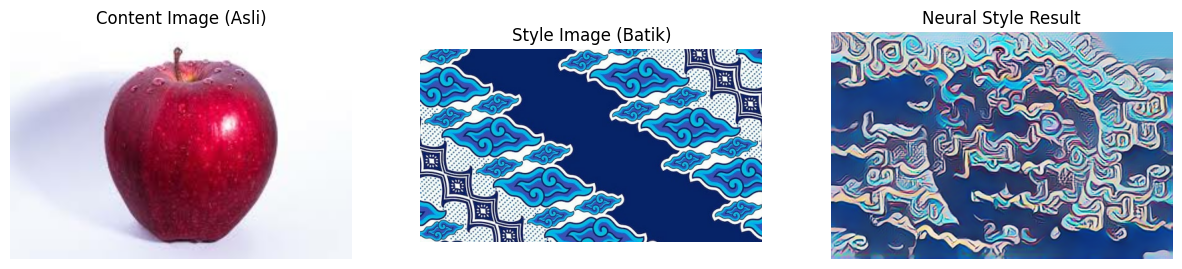


Gambar hasil tersimpan otomatis di: /content/drive/MyDrive/Neural_Style_Transfer/Hasil_Neural_Style_Transfer1.jpg


In [17]:
# JUDUL PROYEK: Neural Style Transfer (NST) dengan Motif Batik Mega Mendung
# DESKRIPSI: Menggabungkan konten foto dengan gaya artistik Batik menggunakan Deep Learning.

import functools
import os
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import PIL
from google.colab import drive

print("TensorFlow Version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Menghubungkan ke Google Drive
try:
    drive.mount('/content/drive')
except Exception as e:
    print("Drive mounting skipped. Pastikan dijalankan di Google Colab.")

def load_img(path_to_img):
    """Memuat gambar dan pre-processing agar bisa dibaca oleh Neural Network."""
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

def imshow(image, title=None):
    """Menampilkan tensor gambar."""
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)

def tensor_to_image(tensor):
    """Mengonversi output Neural Network kembali menjadi file gambar."""
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

# Menggunakan path yang Anda berikan sebelumnya
content_path = '/content/drive/MyDrive/Neural_Style_Transfer/apple.jpeg'
style_path   = '/content/drive/MyDrive/Neural_Style_Transfer/batik_mega_mendung.jpg'

# Path untuk menyimpan hasil
output_path  = '/content/drive/MyDrive/Neural_Style_Transfer/Hasil_Neural_Style_Transfer1.jpg'

print("\n--- Memulai Proses Neural Style Transfer ---")

if not os.path.exists(content_path) or not os.path.exists(style_path):
     print(f"⚠️ Error: File gambar tidak ditemukan. Cek path di Google Drive Anda.")
else:
    # 1. Load Gambar Input
    print("1. Memuat gambar Content dan Style...")
    content_image = load_img(content_path)
    style_image = load_img(style_path)

    # 2. Load Model Neural Network
    # Menggunakan InceptionV3/MobileNet based model dari TF Hub
    print("2. Mengaktifkan Model Neural Network...")
    hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
    hub_module = hub.load(hub_handle)

    # 3. Feed-Forward (Proses Transfer Gaya)
    print("3. Sedang memproses 'Style Transfer'...")
    outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
    stylized_image = outputs[0]

    print("✅ Proses selesai!")

    # Visual Hasil
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 3, 1)
    imshow(content_image, 'Content Image (Asli)')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    imshow(style_image, 'Style Image (Batik)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    imshow(stylized_image, 'Neural Style Result')
    plt.axis('off')
    plt.show()

    # Menyimpan hasil ke Drive
    result_pil = tensor_to_image(stylized_image)
    result_pil.save(output_path)
    print(f"\nGambar hasil tersimpan otomatis di: {output_path}")